In [1]:
import numpy as np

fruits = np.load('data/fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [4]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)

    rows = int(np.ceil(n/10))

    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

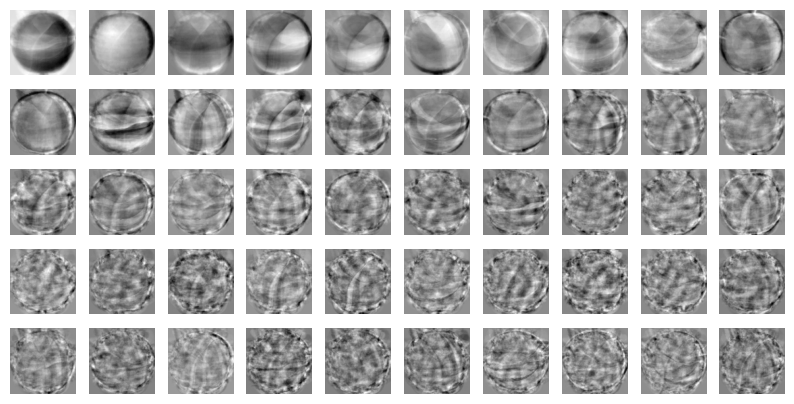

In [6]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [7]:
fruits_2d.shape

(300, 10000)

In [8]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

In [9]:
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

In [10]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

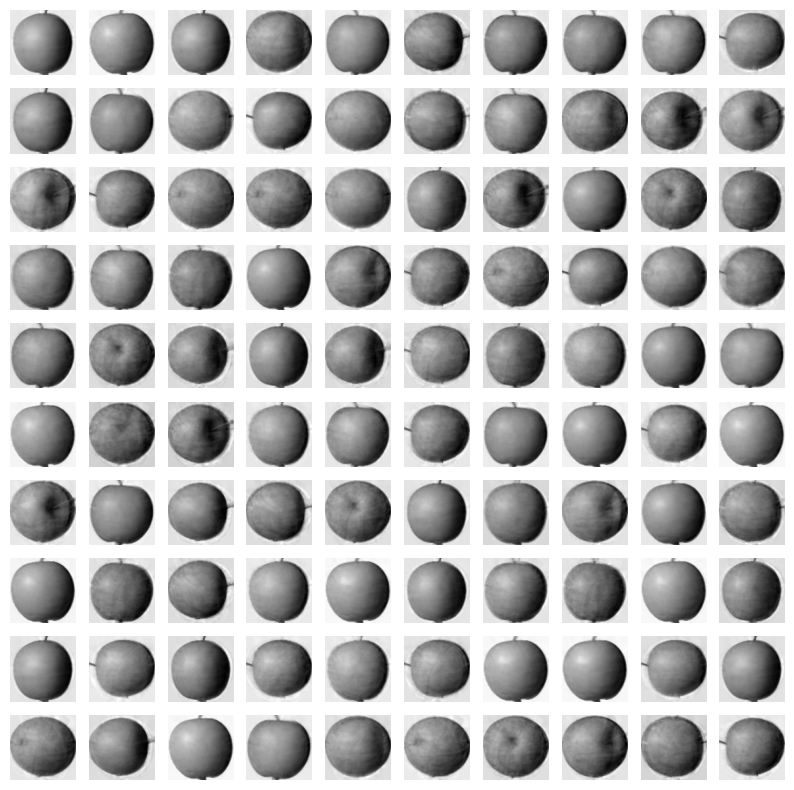

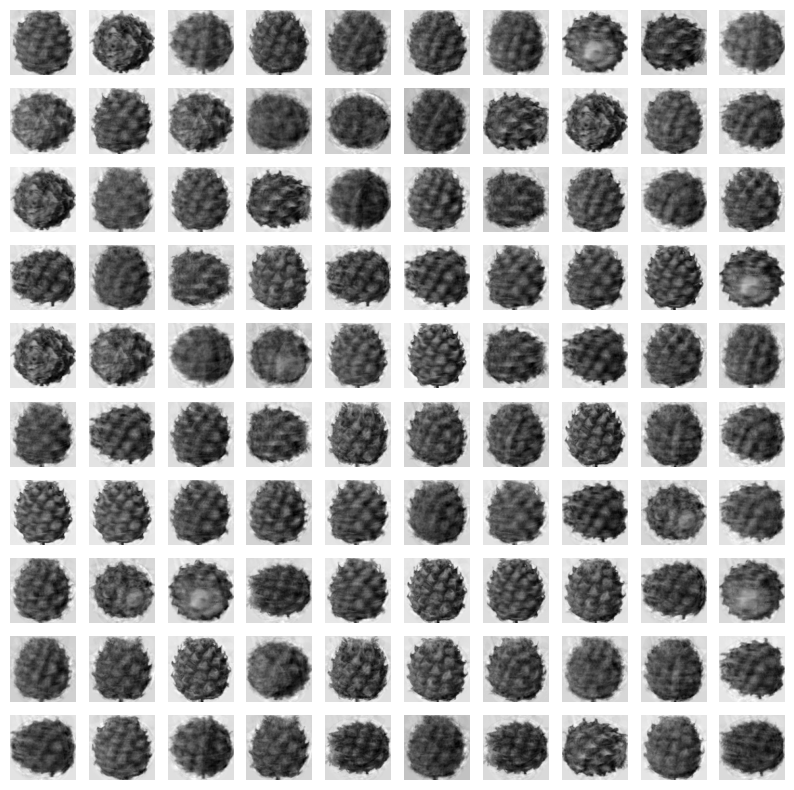

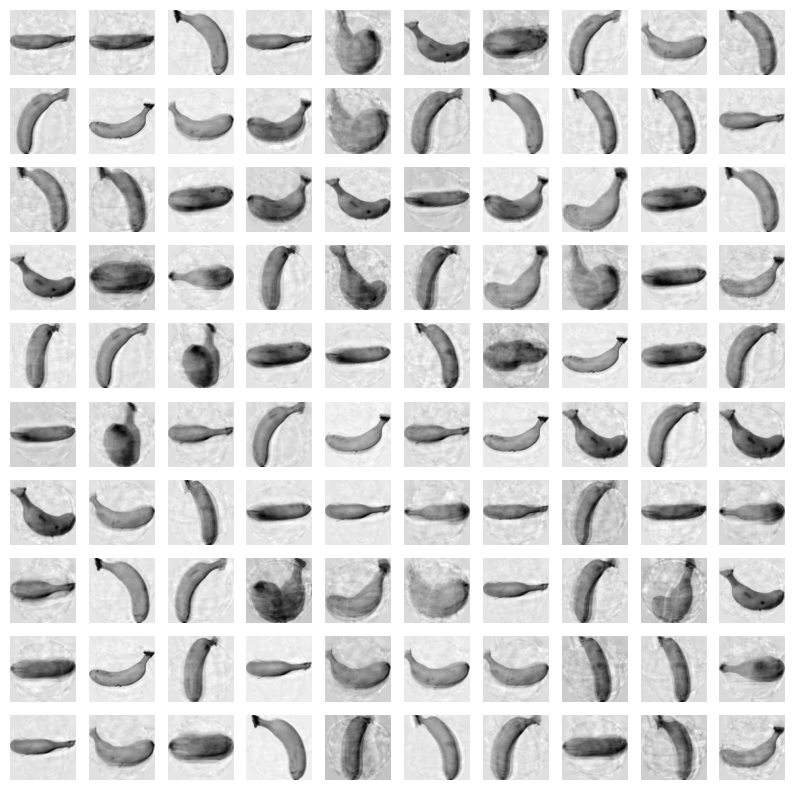

In [11]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print('\n')

In [13]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578895, 0.00511201, 0.00486383, 0.00480346,
       0.00447834, 0.00437314, 0.00408031, 0.00389478, 0.00372439,
       0.00359284, 0.00331469, 0.00317795, 0.00304255, 0.00303641,
       0.00288878, 0.0027582 , 0.00264853, 0.00255886, 0.00251927,
       0.00246948, 0.00239509, 0.00230735, 0.00222156, 0.00216779,
       0.00213532, 0.00196116, 0.00192852, 0.00190141, 0.00185308,
       0.00183108, 0.00173615, 0.00167786, 0.00162039, 0.00161022])

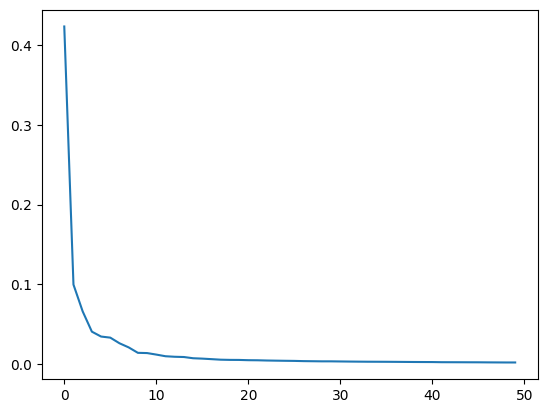

In [15]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr = LogisticRegression()

In [19]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [20]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
scores

{'fit_time': array([0.14298964, 0.12361646, 0.12841177, 0.13520432, 0.1286459 ]),
 'score_time': array([0.00200081, 0.00200152, 0.0030005 , 0.0019989 , 0.00199914]),
 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}

In [21]:
scores = cross_validate(lr, fruits_pca, target)
scores

{'fit_time': array([0.00699854, 0.00758624, 0.00700855, 0.01537037, 0.01448917]),
 'score_time': array([0.0010004 , 0.00049973, 0.0010004 , 0.        , 0.        ]),
 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}

In [22]:
# 나중에 깃헙보고 따라가장 ! ppt만들기 타임